In [5]:
import os
os.getcwd()

'/Users/sally/Documents/GitHub/DSC180Q2/notebooks'

In [11]:
import os
import shutil
import bagpy
import rosbag
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import math



print('Output directory created successfully')

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'semi_circle_0_9.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom = pd.read_csv(odom_data)
#df_odom.to_csv(os.path.join(outdir,'odom_data_test.csv'))

print('Extracted .bag data and written to destination successfully')

Output directory created successfully


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sally/Documents/GitHub/DSC180Q2/data/raw/semi_circle_0_7.bag'

In [ ]:
df_odom

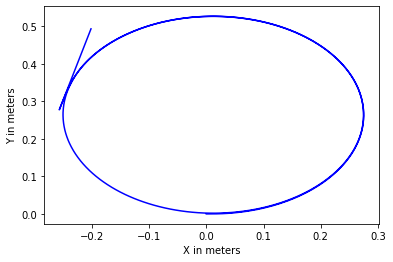

odom plot success!


In [10]:
# df_odom['pos_x'] = pos_x
# df_odom['pos_y'] = pos_y
plt.plot(df_odom['pose.pose.position.x'], df_odom['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
plt.show()
print('odom plot success!')

In [24]:
import os
import shutil
import bagpy
import rosbag
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import math



print('Output directory created successfully')

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'straight_3412.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom = pd.read_csv(odom_data)
#df_odom.to_csv(os.path.join(outdir,'odom_data_test.csv'))

print('Extracted .bag data and written to destination successfully')

Output directory created successfully
[INFO]  Successfully created the data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/straight_3412.
Extracted .bag data and written to destination successfully


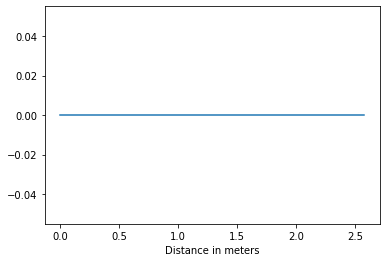

In [43]:
plt.figure()
plt.plot(df_odom['pose.pose.position.x'], [0] * len(df_odom))
plt.xlabel('Distance in meters')
plt.show()

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
541    2.580117
542    2.580117
543    2.580117
544    2.580117
545    2.580117
Name: pose.pose.position.x, Length: 546, dtype: float64